# Source of dataset
https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/input

#Ouestions
Through simple EDA without any model predictions-

1-What age group churn more often.

2-What percentage of people churn vs not churn.

3-Correlations between all the columns of dataset.

4-Who exited most active or non-active members?

Prediction by Model-

5- Which feature of the datset contributed most customer to churn?

6- Make a model which help to predict next person at a particular age is going to churn or not.



In [1]:
# Libraries
import pandas as pd
import numpy as np

### Load Data

In [2]:
bank_churn= pd.read_csv(r'/Users/shikhagautam/Documents/IOD/Churn_Modelling.csv')

In [3]:
#Reading Data
bank_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
bank_churn.shape

(10000, 14)

In [6]:
#Basic information

bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Finding any null values in data.
bank_churn.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
bank_churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data cleaning
Going to drop rownumber because it is just like index but instead of 0 it starts with 1.

We also don't need  surname column.

In [9]:
bank_churn= bank_churn.drop(['RowNumber', 'Surname'], axis=1)

In [10]:
bank_churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
bank_churn.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
bank_churn['Age'].min()

18

In [13]:
bank_churn['Age'].max()

92

In [14]:
bank_churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
bank_churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# EDA

As I don't have any any value missing. 

My data is pretty clear so now I am going to do some EDA on that.

In [16]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

Answer1
I answered it With Tableau

## Insights-
Answer of Question 2- 

As we can see from the above pie chart that 20% people have churned. 

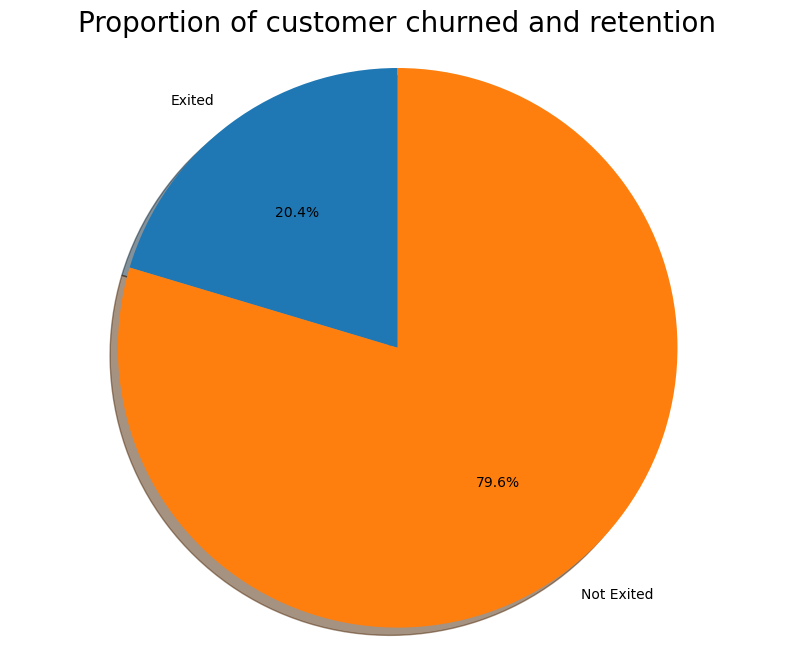

In [17]:
labels = 'Exited', 'Not Exited'
sizes = [bank_churn.Exited[bank_churn['Exited']==1].count(), bank_churn.Exited[bank_churn['Exited']==0].count()]
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title("Proportion of customer churned and retention", size = 20)
plt.show()

## Correlation
Answer3- from the below correlation we can say that age has a strongest correlation with exited and then balance.

In [18]:
bank_churn.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

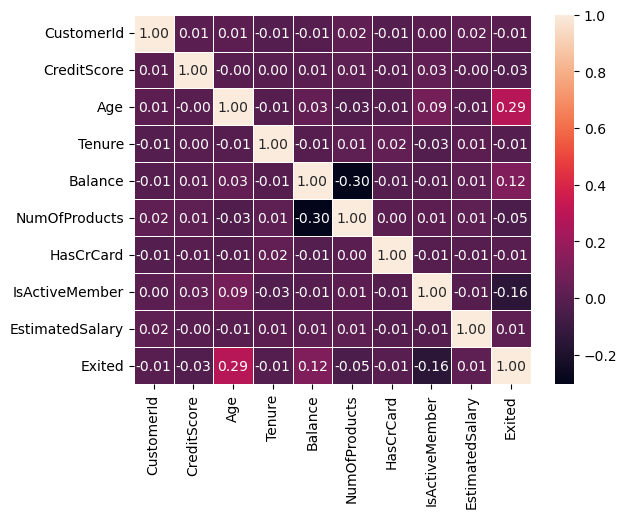

In [19]:
sns.heatmap(bank_churn.corr(),annot=True, fmt=".02f",linewidth=.5)

## Feature Engineering

In [20]:
# Convert cateogrical values into dummy variables using one-hot encoding

bank_churn= pd.get_dummies(bank_churn, columns =["Geography", "Gender"])
bank_churn.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Prediction with model

### Model1-
Logistic regression

In [236]:
# libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [237]:
X= bank_churn[['CreditScore','Age','Tenure',
               'Balance','NumOfProducts','HasCrCard','IsActiveMember',
               'EstimatedSalary','Geography_France','Geography_Germany'
              ,'Gender_Female']]

# I tried all features and got very bad results for 1 so i tried this feature selection method.

In [238]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False  True False False  True False  True False False  True  True]
Feature Ranking: [5 1 4 6 1 2 1 7 3 1 1]


In [239]:
X= bank_churn[['Age','IsActiveMember',
               'Geography_France','Geography_Germany'
              ,'Gender_Female'
              ,'HasCrCard','NumOfProducts']]
y= bank_churn['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [240]:
# Create Model
model = LogisticRegression(max_iter=200)

In [241]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [242]:
model.coef_

array([[ 0.07110051, -1.09515274, -0.06768796,  0.82153676,  0.52406254,
        -0.08598358, -0.13882235]])

In [243]:
model.intercept_

array([-3.9893558])

In [244]:
feature_cols=X
for col in zip(X_train.columns, model.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))

Age         +0.071101
IsActiveMember  -1.095153
Geography_France  -0.067688
Geography_Germany  +0.821537
Gender_Female  +0.524063
HasCrCard   -0.085984
NumOfProducts  -0.138822


In [245]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_[0],
                                'abs_coef': np.abs(model.coef_[0])})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    plt.xticks(rotation=90)
    sns.barplot(x="variable", y="coef", data=model_coefs)

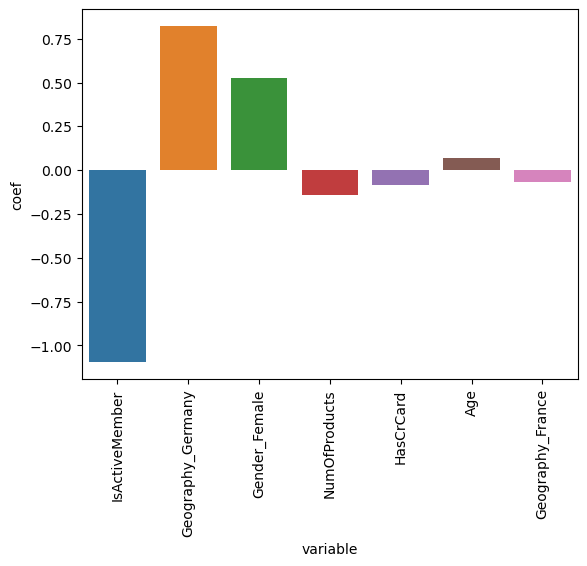

In [246]:
view_coeff(X,model)

In [247]:
y_pred=model.predict(X_train)
accuracy_score(y_train,y_pred)

0.811375

In [248]:
#Accuracy score on test sets
y_pred_lr=model.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7855

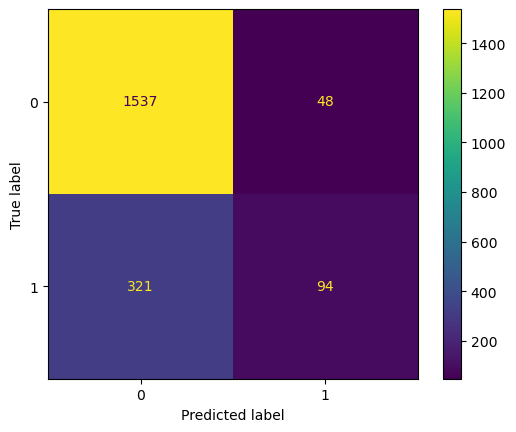

In [249]:
cm=metrics.confusion_matrix(y_test, y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [250]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1585
           1       0.66      0.23      0.34       415

    accuracy                           0.82      2000
   macro avg       0.74      0.60      0.62      2000
weighted avg       0.79      0.82      0.78      2000



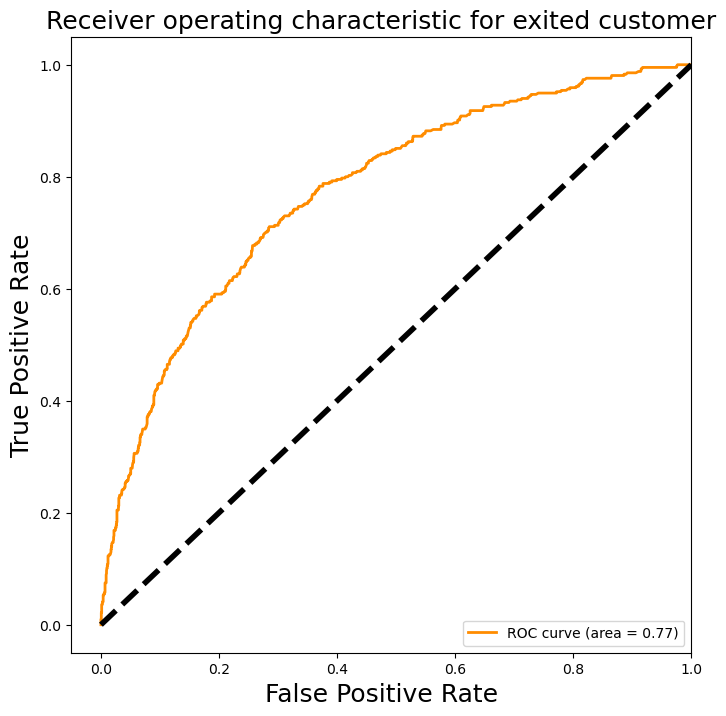

In [251]:
# Generate the prediction values for each of the test observations using predict_proba() function
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_exited)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for exited customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### Model-2
Support Vector Machine(SVM)

In [252]:
#libraries
from sklearn import svm
from sklearn.svm import SVC

In [253]:
# Create Model
svm_model = SVC(probability=True)

In [255]:
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [256]:
y_pred_svm=svm_model.predict(X_test)
accuracy_score(y_test,y_pred_svm)

0.7925

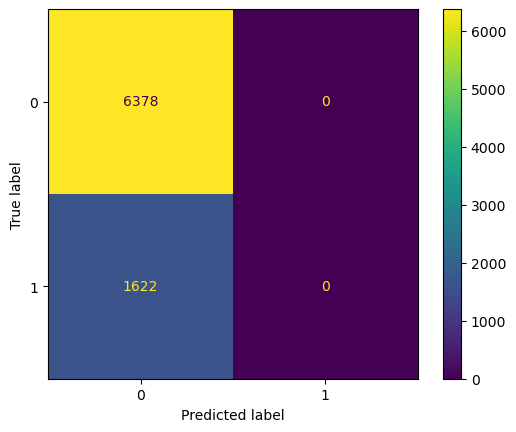

In [257]:
y_train_pred=svm_model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()
plt.show()

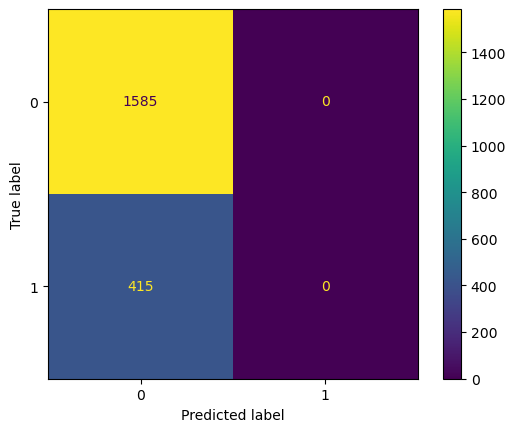

In [258]:
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [259]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



/Users/shikhagautam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shikhagautam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shikhagautam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

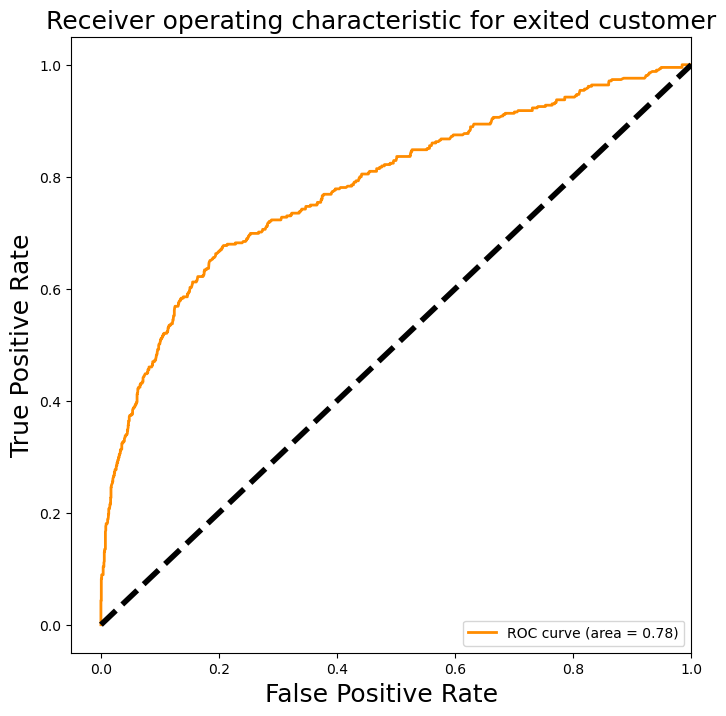

In [260]:
# Generate the prediction values for each of the test observations using predict_proba() function
preds = svm_model.predict_proba(X_test)[:,1]
#preds=svm_model.predict(X_test)

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_exited)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for exited customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Model 3

Naive Bayes

In [261]:
#libraries
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [262]:
naive_bayes = GaussianNB()

In [263]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [264]:
y_pred_nb=naive_bayes .predict(X_test)
accuracy_score(y_test,y_pred_nb)

0.825

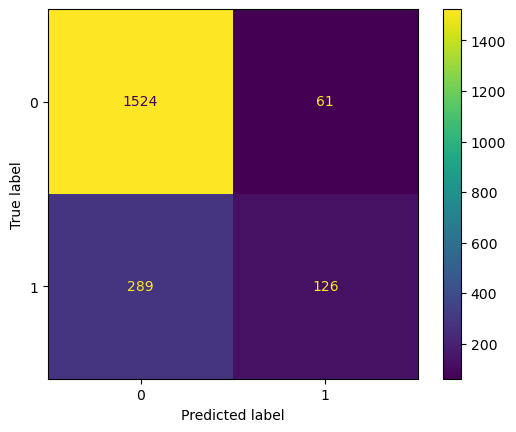

In [265]:
cm = confusion_matrix(y_test, y_pred_nb, labels=naive_bayes.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
disp.plot()
plt.show()

In [266]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1585
           1       0.67      0.30      0.42       415

    accuracy                           0.82      2000
   macro avg       0.76      0.63      0.66      2000
weighted avg       0.81      0.82      0.80      2000



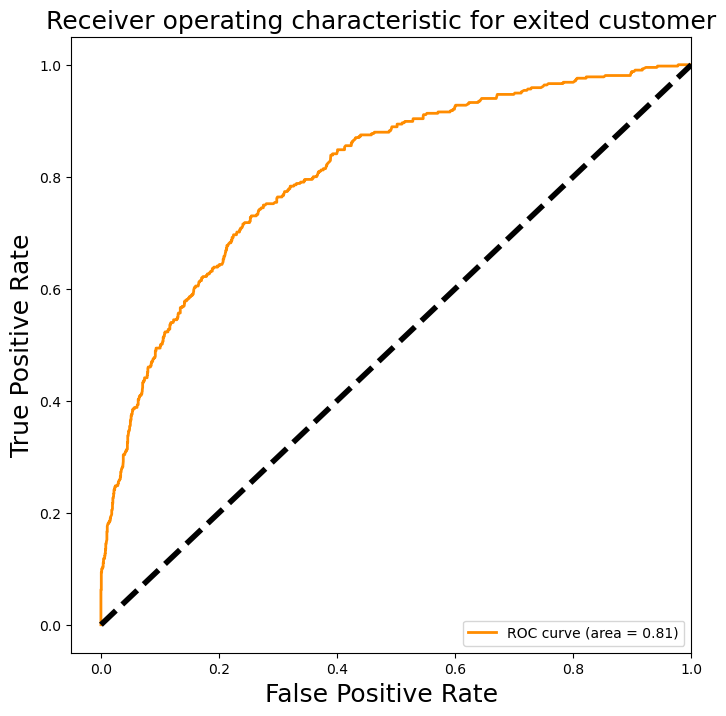

In [267]:
# Generate the prediction values for each of the test observations using predict_proba() function
preds =naive_bayes.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_exited)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for exited customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

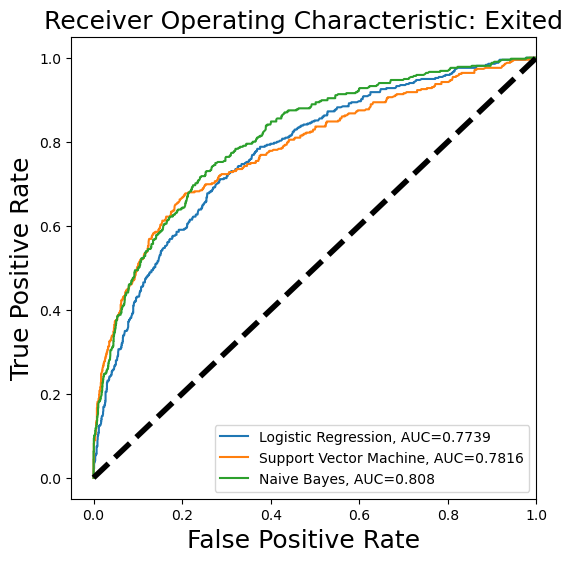

In [271]:
from sklearn import metrics

plt.figure(figsize=[6,6])

y_pred_lr =model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))


y_pred_svm =svm_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_svm)
auc = round(metrics.roc_auc_score(y_test, y_pred_svm), 4)
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(auc))

y_pred_nb =naive_bayes.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_nb)
auc = round(metrics.roc_auc_score(y_test, y_pred_nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: Exited', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Results
As we can see here that Naive bayes performed better as compare to logistic and Support vector machine model.